# The Unsent Project - Exploratory Data Analysis
## Insert README.md here

## Import Packages as always

In [1]:
import pandas as pd
import csv
from collections import defaultdict, Counter

import matplotlib.pyplot as plt
import seaborn as sns

import spacy
nlp = spacy.load("en_core_web_md")

## Setting up / grouping documents

#### Overall

In [71]:
# START HERE
df = pd.read_csv('D:/Coding/Projects/Python/The Unsent Project/unsent_data_final.csv')

In [3]:
df.head()

,name,date,color,message
0,Evan,June 30 2020,Tangerine,All I want is you to be happy. I love you fore...
1,Procureur,June 30 2020,Light Pink,Tu es mon meilleur ami\\n\n
2,shiv,June 30 2020,Pale Purple,i loved you more than you ever cared for me. i...
3,brendan,June 30 2020,Yellow,you make me so incredibly happy & im so in lov...
4,James,June 30 2020,Yellow,There this thing about you. No matter how many...


Stemming and lemmatization is best used for when we have low amounts of data, because with enough data, the smaller differences in word forms can make a model more accurate. Here, we have a surplus of data, so lemmatization will only decrease the accuracy of the model.

#### Drop duplicates

In [4]:
len(df)

199931

In [5]:
len(df.drop_duplicates())

196604

In [6]:
(len(df) - len(df.drop_duplicates())) / len(df) * 100

1.6640741055664203

Because duplicate posts do not make up a significant portion of the data, I'm not going to remove them, because they won't have a drastic effect, and also I'm pretty sure that any duplicates were actually submitted by real people, so it does add to the accuracy of the representation.

#### By Color

In [7]:
colors = ['Army Green','Black','Blue','Blue Grey','Brown','Dark Blue','Dark Green','Dark Purple','Green','Grey',\
          'Light Blue','Light Green','Light Grey','Light Orange','Light Pink','Light Purple','Maroon','Orange',\
          'Pale Blue','Pale Pink','Pale Purple','Peach','Pink','Purple','Red','Tan','Tangerine','Turquoise','White',\
          'Wine','Yellow']

In [8]:
colors_dict = {'color': [], 'message': []}
for color in colors:
    messages = df.loc[df['color'] == color]
    mega_doc = ' '.join([str(m) for m in messages['message']])
    colors_dict['color'].append(color)
    colors_dict['message'].append(mega_doc)
colors_df = pd.DataFrame(data=colors_dict, index=range(len(colors)))

In [9]:
colors_df.head()

,color,message
0,Army Green,I wish u were here with me.\\\\n\\r\\n\r\n I s...
1,Black,just talk to me dammit.\\\\n\\r\\n\r\n a part ...
2,Blue,I know youll never love me as much as I love y...
3,Blue Grey,u deserved better than what i gave u\\n\n the ...
4,Brown,bread\\\\\\\\n-nica\\\\n\\r\\n\r\n why are you...


## Overall Frequencies - Words, Names, Colors
This will give us a general overview of what the posts entail, and some interesting trends.

### Most common words, names, colors overall

In [17]:
from collections import Counter
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction import stop_words
stop_words = list(stop_words.ENGLISH_STOP_WORDS)

#### Words

In [11]:
total_corpus = word_tokenize(' '.join(df['message'].apply(lambda x: str(x).lower())))

In [12]:
vocab = set(total_corpus)

In [13]:
word_counts = Counter(total_corpus)

In [21]:
word_counts.most_common(20)
[(word, count) for word, count in word_counts.most_common() if word not in stop_words][:20]

[('.', 236507),
 ('love', 54562),
 (',', 51495),
 ('im', 37269),
 ('know', 26741),
 ('?', 25230),
 ('dont', 24336),
 ('wish', 23866),
 ('miss', 22003),
 ('like', 21957),
 ('just', 21673),
 ('think', 18183),
 ('youre', 17268),
 ('u', 16815),
 ('hope', 16526),
 ('want', 16234),
 ('did', 14556),
 ('feel', 13593),
 ('sorry', 12673),
 ('time', 12304)]

#### Names

In [22]:
total_names = df['name'].apply(lambda x: str(x).lower())

In [23]:
len(df)

199931

In [24]:
len(df[df['name'] != 'nan'])

199931

In [25]:
unique_names = set(total_names)
unique_names

{'deer',
 'you know who you are.',
 'high school football player',
 'peter j',
 'tytus',
 'taran',
 'narancia',
 'sodapop',
 'people',
 't rafee',
 'noah g',
 'seaweed brain',
 'tom holland',
 'odz',
 'youknow',
 'kaid b',
 'gary',
 'dan:)',
 'aidan g',
 'rev',
 'gustavo',
 'keelin',
 'karlene',
 'affen junge',
 'hanna',
 'kim seungmin',
 'isaiah r',
 'apsc',
 'timothee chalamet',
 'quinlan',
 'mihika',
 'nguyen',
 'pete s',
 'dylan/ari',
 'uncle wally',
 'claire d',
 'chelsee',
 'liluye',
 'zobair',
 'burgus',
 'such a moron',
 'daina',
 'malichi',
 'treasure kershaw',
 'arden',
 'kyle g',
 'trent o',
 'amber s.',
 'jesus rodriguez',
 'britney marcelo',
 'mommabear',
 'vigan',
 'grumpynugget',
 'ale robaina',
 'josh n',
 'madeja',
 'lmg',
 'stephen c',
 'jaydan',
 'bogi',
 'grandmom',
 'colyn',
 'krasinsky p3',
 'armwrist',
 'marley finnen',
 'michiko',
 'filippos p',
 'cayla',
 'liam z',
 'amy',
 'dainel',
 'mia (me)',
 'felicitas',
 'verian',
 'miriam heinrich',
 'starsha',
 'nick w

In [26]:
name_counts = Counter(total_names)

In [27]:
name_counts.most_common() # wow. people really like letters.

[('j', 3720),
 ('a', 2893),
 ('m', 2339),
 ('nan', 1844),
 ('c', 1790),
 ('s', 1645),
 ('alex', 1578),
 ('d', 1562),
 ('b', 1522),
 ('jack', 1392),
 ('you', 1374),
 ('k', 1314),
 ('t', 1287),
 ('r', 1208),
 ('e', 1198),
 ('ryan', 1072),
 ('l', 1041),
 ('nick', 1036),
 ('josh', 990),
 ('sam', 974),
 ('ethan', 974),
 ('andrew', 944),
 ('g', 938),
 ('jacob', 916),
 ('ben', 899),
 ('michael', 849),
 ('tyler', 817),
 ('n', 815),
 ('chris', 808),
 ('jake', 808),
 ('daniel', 779),
 ('p', 744),
 ('matt', 717),
 ('dylan', 708),
 ('h', 704),
 ('david', 688),
 ('james', 685),
 ('noah', 682),
 ('dad', 679),
 ('matthew', 660),
 ('max', 654),
 ('will', 653),
 ('luke', 631),
 ('adam', 583),
 ('brandon', 580),
 ('john', 559),
 ('connor', 540),
 ('z', 538),
 ('christian', 522),
 ('justin', 517),
 ('him', 513),
 ('anthony', 502),
 ('zach', 501),
 ('nathan', 499),
 ('v', 490),
 ('evan', 487),
 ('austin', 482),
 ('jackson', 481),
 ('mom', 479),
 ('kyle', 477),
 ('logan', 470),
 ('myself', 470),
 ('f', 464

Notable findings: 7 out of the top 10 are just letters, many more traditionally male names appear more often by a very very significant margin, except 'mom' shows up pretty early with 537.

#### Colors

In [28]:
total_colors = [color for color in df['color'] if color in colors] # the good ones from earlier

In [29]:
unique_colors = colors

In [30]:
color_counts = Counter(total_colors)

In [31]:
color_counts.most_common() # maybe make a visual with the actual colors next to them

[('Black', 30383),
 ('Pale Blue', 16391),
 ('Yellow', 13599),
 ('Light Blue', 11222),
 ('Pale Pink', 10219),
 ('Red', 10036),
 ('Maroon', 9873),
 ('Dark Blue', 9760),
 ('Light Purple', 9107),
 ('Pale Purple', 6301),
 ('Light Pink', 4957),
 ('Blue', 4834),
 ('Dark Green', 4708),
 ('Turquoise', 4602),
 ('Purple', 4527),
 ('Light Green', 4298),
 ('Pink', 4288),
 ('Dark Purple', 3764),
 ('Light Orange', 3728),
 ('Tangerine', 3685),
 ('Green', 3628),
 ('Grey', 3606),
 ('White', 3387),
 ('Orange', 3341),
 ('Army Green', 2909),
 ('Light Grey', 2648),
 ('Blue Grey', 2606),
 ('Tan', 2603),
 ('Wine', 1961),
 ('Peach', 1788),
 ('Brown', 1172)]

In [37]:
# turn counter object into dataframe
color_counts_df = pd.DataFrame.from_dict(color_counts, orient='index').reset_index()

In [39]:
# rename columns
color_counts_df = color_counts_df.rename(columns={'index':'color', 0:'count'})

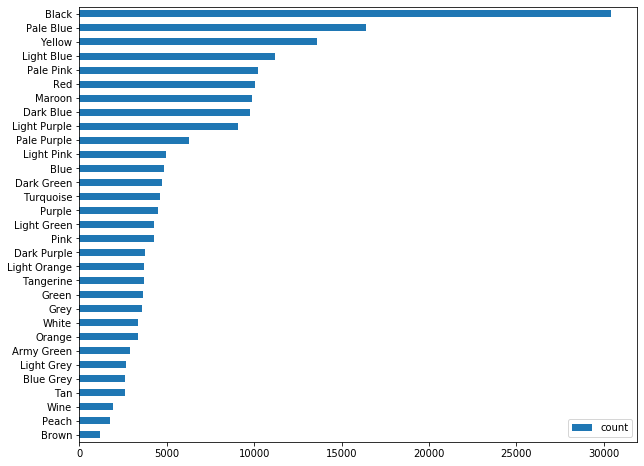

In [63]:
sorted_color_counts_df = color_counts_df.sort_values(by='count')
ax = sorted_color_counts_df.plot(kind='barh', figsize=(10, 8))
ax.set_yticklabels(labels=sorted_color_counts_df['color']);

### Most common/unique words/names per color

#### Words

In [72]:
color_corpus = {}
for i, row in colors_df.iterrows():
    color = row['color']
    message = row['message']
    color_corpus[color] = word_tokenize(message.lower())

In [73]:
color_vocab = {}
for color in color_corpus:
    color_vocab[color] = set(color_corpus[color])

In [74]:
color_word_counts = {}
for color in color_corpus:
    color_word_counts[color] = Counter(color_corpus[color])

Most common words for each color (that aren't stop words)

In [75]:
for color in color_word_counts:
    print (color, [word for word, count in color_word_counts[color].most_common(30) if word not in stop_words])

Army Green ['.', ',', 'love', 'im', '?', 'know', 'wish', 'dont']
Black ['.', ',', 'love', 'im', '?', 'know', 'dont']
Blue ['.', 'love', ',', 'im', 'wish', 'know', 'dont']
Blue Grey ['.', ',', 'love', 'im', '?', 'dont']
Brown ['.', ',', 'love', 'im', '?', 'like']
Dark Blue ['.', ',', 'love', 'im', 'know', 'wish', '?']
Dark Green ['.', ',', 'love', 'im', 'know', 'wish', 'dont']
Dark Purple ['.', ',', 'love', 'im', '?', 'know', 'wish', 'dont']
Green ['.', 'love', ',', 'im', 'know', 'wish', '?']
Grey ['.', ',', 'love', 'im', '?', 'dont', 'know']
Light Blue ['.', 'love', ',', 'im', 'know', 'wish']
Light Green ['.', ',', 'love', 'im', 'know', 'dont', '?']
Light Grey ['.', ',', 'love', 'im', 'know', '?', 'dont']
Light Orange ['.', ',', 'love', 'im', '?', 'know']
Light Pink ['.', 'love', 'im', ',', 'know', 'dont', 'wish']
Light Purple ['.', 'love', ',', 'im', 'know', 'miss', 'wish']
Maroon ['.', 'love', ',', 'im', 'know', 'dont', '?']
Orange ['.', 'love', ',', 'im', '?', 'know', 'wish']
Pale B

Most common words for each color that aren't in other colors

In [76]:
n_most_common = 500 # for 100 and 200, most were empty --- little characterization in other colors among most \
# common words (at least with stop_words) --- the unsent feeling is pretty universal?? --- also take into account that the \
# more words, the more likely other colors will have them
for color in color_word_counts:
    other_color_words = []
    for other_color in [col for col in color_word_counts if col != color]:
        other_color_words.extend([word for word, count in color_word_counts[other_color].most_common(n_most_common)])
    unique_words = [word for word, count in color_word_counts[color].most_common(n_most_common) if word not in other_color_words]
    #unique_words = [(word, count) for word, count in color_word_counts[color].most_common(n_most_common) \
                    #if word not in other_color_words] # at 500, counts are in the double and single digits
    print (color, unique_words)

Army Green ['worry', 'drunk', 'confused', 'calling']
Black ['black']
Blue ['chip', 'fought']
Blue Grey ['parents', 'room', 'harder', 'brain', 'effort', 'teyou']
Brown ['brown', 'poop', 'attention', 'suck', 'eat', 'smell', 'ab', 'selfish', 'ugly', 'dick', 'pee', 'sit', 'liking', 'wants', 'cuz', 'ka', 'absolute', 'breath']
Dark Blue ['universe', 'holding']
Dark Green []
Dark Purple ['s', 'you..', 'courage', 'horrible']
Green ['eu', 'vc', 'q', 'whatever', 'timing', 'decided']
Grey ['admit']
Light Blue []
Light Green ['gay', 'cool', 'understood']
Light Grey ['destroyed', 'cut', 'during', 'mistake', 'pushed', 'using', 'heard', 'deeply']
Light Orange []
Light Pink ['sister', 'closer', 'appreciate']
Light Purple ['5']
Maroon []
Orange ['possible', 'happiest', 'favourite']
Pale Blue []
Pale Pink ['marry']
Pale Purple ['hoping']
Peach ['played', 'la', 'game', 'everytime', '-.-', 'hell.\\ni', 'sound', 'under', 'gets', 'm', 'eted', 'mi']
Pink []
Purple ['stand', 'emotions', 'pick']
Red []
Tan ['m

#### Names

In [95]:
color_names = defaultdict(list)
for i, row in df.iterrows():
    color = row['color']
    name = row['name']
    if (color in colors):
        color_names[color].extend(word_tokenize(str(name).lower()))

In [96]:
color_name_counts = {}
for color in color_names:
    color_name_counts[color] = Counter(color_names[color])

In [106]:
for color in color_name_counts:
    #print (color, [name for name, color in color_name_counts[color].most_common(20)])
    print (color, [(name, count) for name, count in color_name_counts[color].most_common(10)])

Maroon [('.', 298), ('a', 209), ('j', 199), ('m', 175), ('alex', 143), ('s', 119), ('r', 111), ('b', 107), ('c', 102), ('e', 98)]
Light Blue [('.', 288), ('j', 201), ('m', 175), ('c', 148), ('a', 146), ('b', 122), ('s', 122), ('d', 101), ('jack', 101), ('k', 99)]
Dark Purple [('.', 117), ('m', 79), ('a', 64), ('j', 61), ('d', 52), ('s', 51), ('b', 46), ('c', 45), ('k', 45), ('alex', 36)]
Purple [('.', 113), ('m', 73), ('j', 62), ('c', 55), ('b', 54), ('s', 50), ('d', 43), ('a', 42), ('p', 39), ('r', 38)]
Orange [('.', 68), ('j', 67), ('m', 63), ('a', 62), ('adam', 51), ('b', 50), ('c', 49), ('d', 37), ('s', 35), ('g', 33)]
Light Grey [('.', 98), ('j', 59), ('m', 54), ('a', 45), ('c', 35), ('b', 31), ('ryan', 30), ('s', 30), ('d', 29), ('alex', 28)]
Dark Green [('.', 131), ('m', 87), ('j', 80), ('b', 69), ('k', 69), ('s', 63), ('g', 59), ('alex', 54), ('d', 54), ('a', 54)]
Light Orange [('.', 84), ('m', 72), ('j', 67), ('a', 62), ('c', 50), ('s', 49), ('b', 46), ('t', 42), ('jack', 41),

## Sentiment + Emotion Analysis
Here I'm using the vader package for sentiment analysis because I think it will be more accurate than if I were to use NRC lexicons, and also because it's just easier. I'm using NRC lexicons for emotions because that is pretty much the only way and also it is generally quite simple.

### Vader Sentiment Analysis

In [97]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [118]:
# I want to get the overall score for each color, then overtime
# for each color
colors_sentiment = {}
for color in colors:
    overall_sentiment = Counter()
    for message in df.loc[df['color'] == color]['message']:
        overall_sentiment += Counter(analyser.polarity_scores(str(message)))
        
    total = len(df.loc[df['color'] == color])
    colors_sentiment[color] = {sent:overall_sentiment[sent] / total for sent in overall_sentiment}

In [119]:
colors_sentiment

{'Army Green': {'neg': 0.10031063829787223,
  'neu': 0.7228996453900721,
  'pos': 0.17643014184397185,
  'compound': 0.2050989007092198},
 'Black': {'neu': 0.7075109442349171,
  'pos': 0.1672742793642245,
  'neg': 0.12467605064655077,
  'compound': 0.1354005556303876},
 'Blue': {'neu': 0.7180728616684257,
  'pos': 0.18512692713833123,
  'compound': 0.24530171066525727,
  'neg': 0.09659197465681105},
 'Blue Grey': {'neg': 0.10300717989629028,
  'neu': 0.7271176705225381,
  'pos': 0.16947506980454743,
  'compound': 0.17706007179896346},
 'Brown': {'neg': 0.12798223801065714,
  'neu': 0.7082735346358794,
  'pos': 0.16196181172291305,
  'compound': 0.11189289520426274},
 'Dark Blue': {'neu': 0.7250968220338952,
  'pos': 0.17877955508474572,
  'neg': 0.09601525423728831,
  'compound': 0.22989635593220303},
 'Dark Green': {'neg': 0.09815792937047584,
  'neu': 0.7208376837025671,
  'pos': 0.18077933757402936,
  'compound': 0.22905871901732752},
 'Dark Purple': {'neg': 0.10832823593664671,
  '

In [124]:
colors_sentiment = pd.DataFrame(colors_sentiment).T # transpose from last step
colors_sentiment.head()

,neg,neu,pos,compound
Army Green,0.100311,0.722900,0.176430,0.205099
Black,0.124676,0.707511,0.167274,0.135401
Blue,0.096592,0.718073,0.185127,0.245302
Blue Grey,0.103007,0.727118,0.169475,0.177060
Brown,0.127982,0.708274,0.161962,0.111893


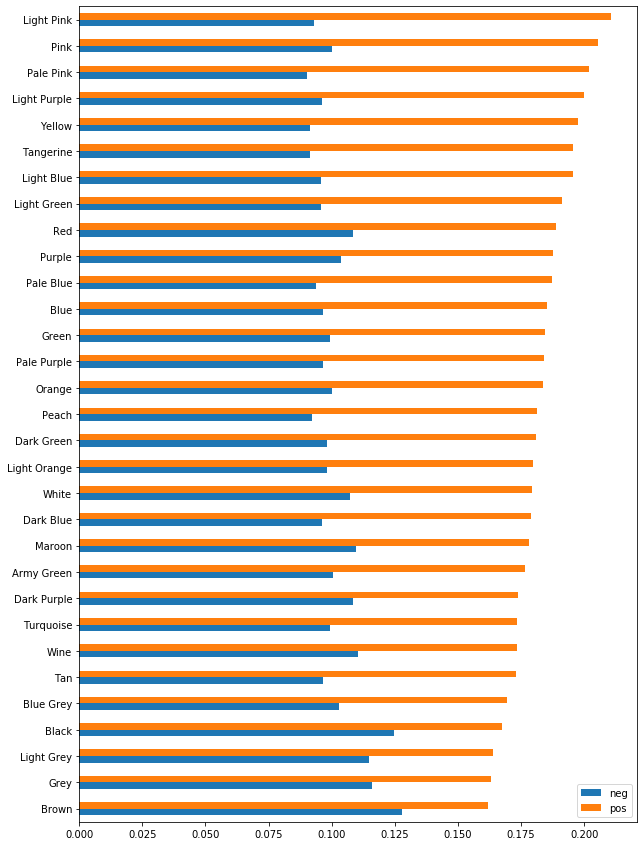

In [134]:
sortby = 'pos'
(colors_sentiment.sort_values(by=sortby)).plot(kind='barh', y=['neg', 'pos'], figsize=(10,15));

Most notable finding here is that pandas is boss for quickly visualizing. Also that the most unsaturated colors, (brown grey light grey black tan) were among the least positive and the most negative. All 3 pinks were the most positive. Positivity general correlated with 'light' labeled colors, and just a lighter to darker pattern in general (except not the color white itself, just lighter colors).

### NRC Emotion Analysis

In [196]:
header = ['word', 'emotion', 'score']
emotion_lexicons = pd.read_csv('D:\Coding\Projects\Python\The Unsent Project/emotion_lexicons.txt', sep='\t', names=header)

In [197]:
emotion_lexicons.head()

,word,emotion,score
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [198]:
words_emotion = defaultdict(lambda: Counter())
for i, row in emotion_lexicons.iterrows():
    word, emotion, score = row
    words_emotion[word][emotion] += score

In [213]:
colors_emotion = {}
for color in colors:
    overall_emotion = Counter()
    for message in df.loc[df['color'] == color]['message']:
        for token in word_tokenize(str(message)):
            overall_emotion += words_emotion[token]
    
    total = len(df.loc[df['color'] == color])
    colors_emotion[color] = {emotion:overall_emotion[emotion] / total for emotion in overall_emotion}

In [214]:
colors_emotion

{'Army Green': {'anticipation': 0.49252243270189433,
  'joy': 0.7002326354270522,
  'positive': 0.9072781655034895,
  'negative': 0.5882352941176471,
  'disgust': 0.21335992023928216,
  'fear': 0.3240279162512463,
  'sadness': 0.37686939182452645,
  'surprise': 0.2685277500830841,
  'trust': 0.48321701561980723,
  'anger': 0.27085410435360585},
 'Black': {'positive': 0.8536381735277118,
  'anticipation': 0.45327853060175965,
  'anger': 0.3664825637402864,
  'fear': 0.4192730075139683,
  'negative': 0.7168454177637916,
  'sadness': 0.4993577804893713,
  'surprise': 0.2554428103525785,
  'disgust': 0.27265429323742857,
  'trust': 0.4320531757754801,
  'joy': 0.6429259520904245},
 'Blue': {'joy': 0.7585929648241206,
  'positive': 0.9782914572864322,
  'trust': 0.48120603015075375,
  'negative': 0.6361809045226131,
  'anger': 0.30110552763819093,
  'disgust': 0.21085427135678392,
  'fear': 0.37306532663316583,
  'sadness': 0.45949748743718594,
  'anticipation': 0.4978894472361809,
  'surpr

In [215]:
colors_emotion = pd.DataFrame(colors_emotion).T # transpose from last step
colors_emotion = colors_emotion.drop(['positive', 'negative'], axis=1) # drop positive and negative emotions
colors_emotion = colors_emotion.reindex(columns=['surprise', 'anticipation', 'joy', 'trust', 'sadness', 'fear',
#                                                'anger', 'disgust'])
colors_emotion.head()

,anticipation,joy,disgust,fear,sadness,surprise,trust,anger
Army Green,0.492522,0.700233,0.213360,0.324028,0.376869,0.268528,0.483217,0.270854
Black,0.453279,0.642926,0.272654,0.419273,0.499358,0.255443,0.432053,0.366483
Blue,0.497889,0.758593,0.210854,0.373065,0.459497,0.277387,0.481206,0.301106
Blue Grey,0.446324,0.613235,0.211029,0.324632,0.382721,0.260662,0.424632,0.287500
Brown,0.418643,0.591987,0.292723,0.337694,0.398201,0.221586,0.424366,0.341783


In [216]:
colors_emotion.to_csv('D:/Coding/Projects/Python/The Unsent Project/colors_emotion2.csv', index=False, header=True)

In [217]:
colors_emotion = pd.read_csv('D:/Coding/Projects/Python/The Unsent Project/colors_emotion2.csv')

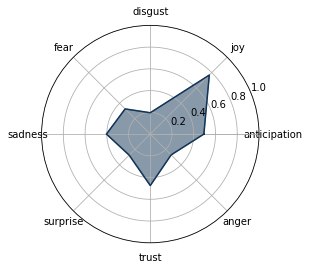

In [218]:
from math import pi
color = 'Blue'
n_emotions = 8
angles = [(i * 2 * pi / n_emotions) % (2 * pi) for i in range(n_emotions)]
angles += [angles[0]]
values = list(colors_emotion.iloc[10, :])
values += [values[0]]
#type(angles), type(values)
plt.polar(angles, values, color='#123456');
plt.fill(angles, values, color='#123456', alpha=0.5)
plt.xticks(angles, colors_emotion.columns);
plt.ylim(0, 1);

In [164]:
colors_colors = {'Orange':'#f97624', 'Light Orange':'#fda34a', 'Tangerine':'#fda27e', \
                'Peach':'#fcd1a6', 'Yellow':'#fefe7c', 'Green':'#44d046', \
                'Army Green':'#71805b', 'Dark Green':'#057009', \
                 'Light Green':'#a7fea7', 'Light Pink':'#fda6fd', 'Pink':'#f978d0', \
                'Pale Pink':'#fbe0df', 'White':'#ffffff', 'Black':'#000000', \
                 'Blue Grey':'#a9b8bb', 'Grey':'#6b6b6b', 'Light Grey':'#a2a2a2', \
                 'Red':'#f81b1b', 'Maroon':'#890404', 'Wine':'#603442', \
                 'Blue':'#1227fc', 'Light Blue':'#46d2fc', 'Dark Blue':'#053ea0', \
                'Turquoise':'#698c8e', 'Pale Blue':'#a9d1ee', \
                'Pale Purple':'#d1c5d8', 'Dull Purple':'#8c7e96', 'Light Purple':'#a377fb', \
                'Purple':'#721bcf', 'Dark Purple':'#341c3f', \
                'Brown':'#a26f40', 'Tan':'#eddbba'}

In [160]:
from matplotlib.patches import Rectangle

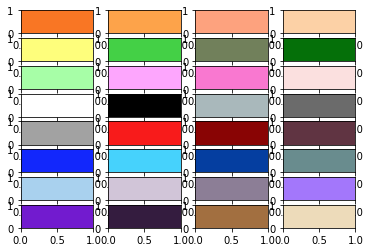

In [170]:
fig, axs = plt.subplots(8, 4)
for i, color in enumerate(colors_colors):
    axs[i // 4, i % 4].add_patch(Rectangle((0,0), 1, 1, color=colors_colors[color]))

C:\Users\Alec\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: UserWarning: Trying to create polar plot on an axis that does not have a polar projection.
  del sys.path[0]
C:\Users\Alec\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  del sys.path[0]


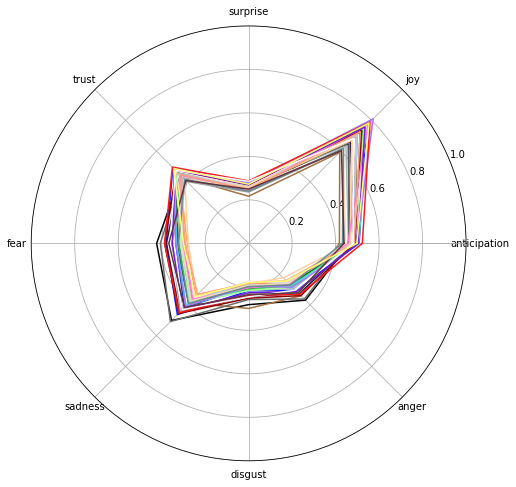

In [192]:
from math import pi
n_emotions = 8
angles = [(i * 2 * pi / n_emotions) % (2 * pi) for i in range(n_emotions)]
angles += [angles[0]]
fig, ax = plt.subplots(figsize=(8, 8))
plt.axis('off')

for i in range(len(colors)):
    values = list(colors_emotion.iloc[i, :])
    values += [values[0]]
    #ax = axs[i // 4, i % 4]
    #axs[i % 6, i // 6].polar(angles, values, color=colors_colors[colors[i]])
    plt.polar(angles, values, color=colors_colors[colors[i]])
    #plt.fill(angles, values, color=colors_colors[colors[i]], alpha=0.2)
    #axs[i % 6, i // 6].xticks(angles, colors_emotion.columns)
    plt.xticks(angles, colors_emotion.columns)
    plt.ylim(0, 1)
    #axs[i % 6, i // 6].ylim(0, 1)

#type(angles), type(values)
#plt.polar(angles, values, color='#123456');
#plt.xticks(angles, colors_emotion.columns);
#plt.ylim(0, 1);

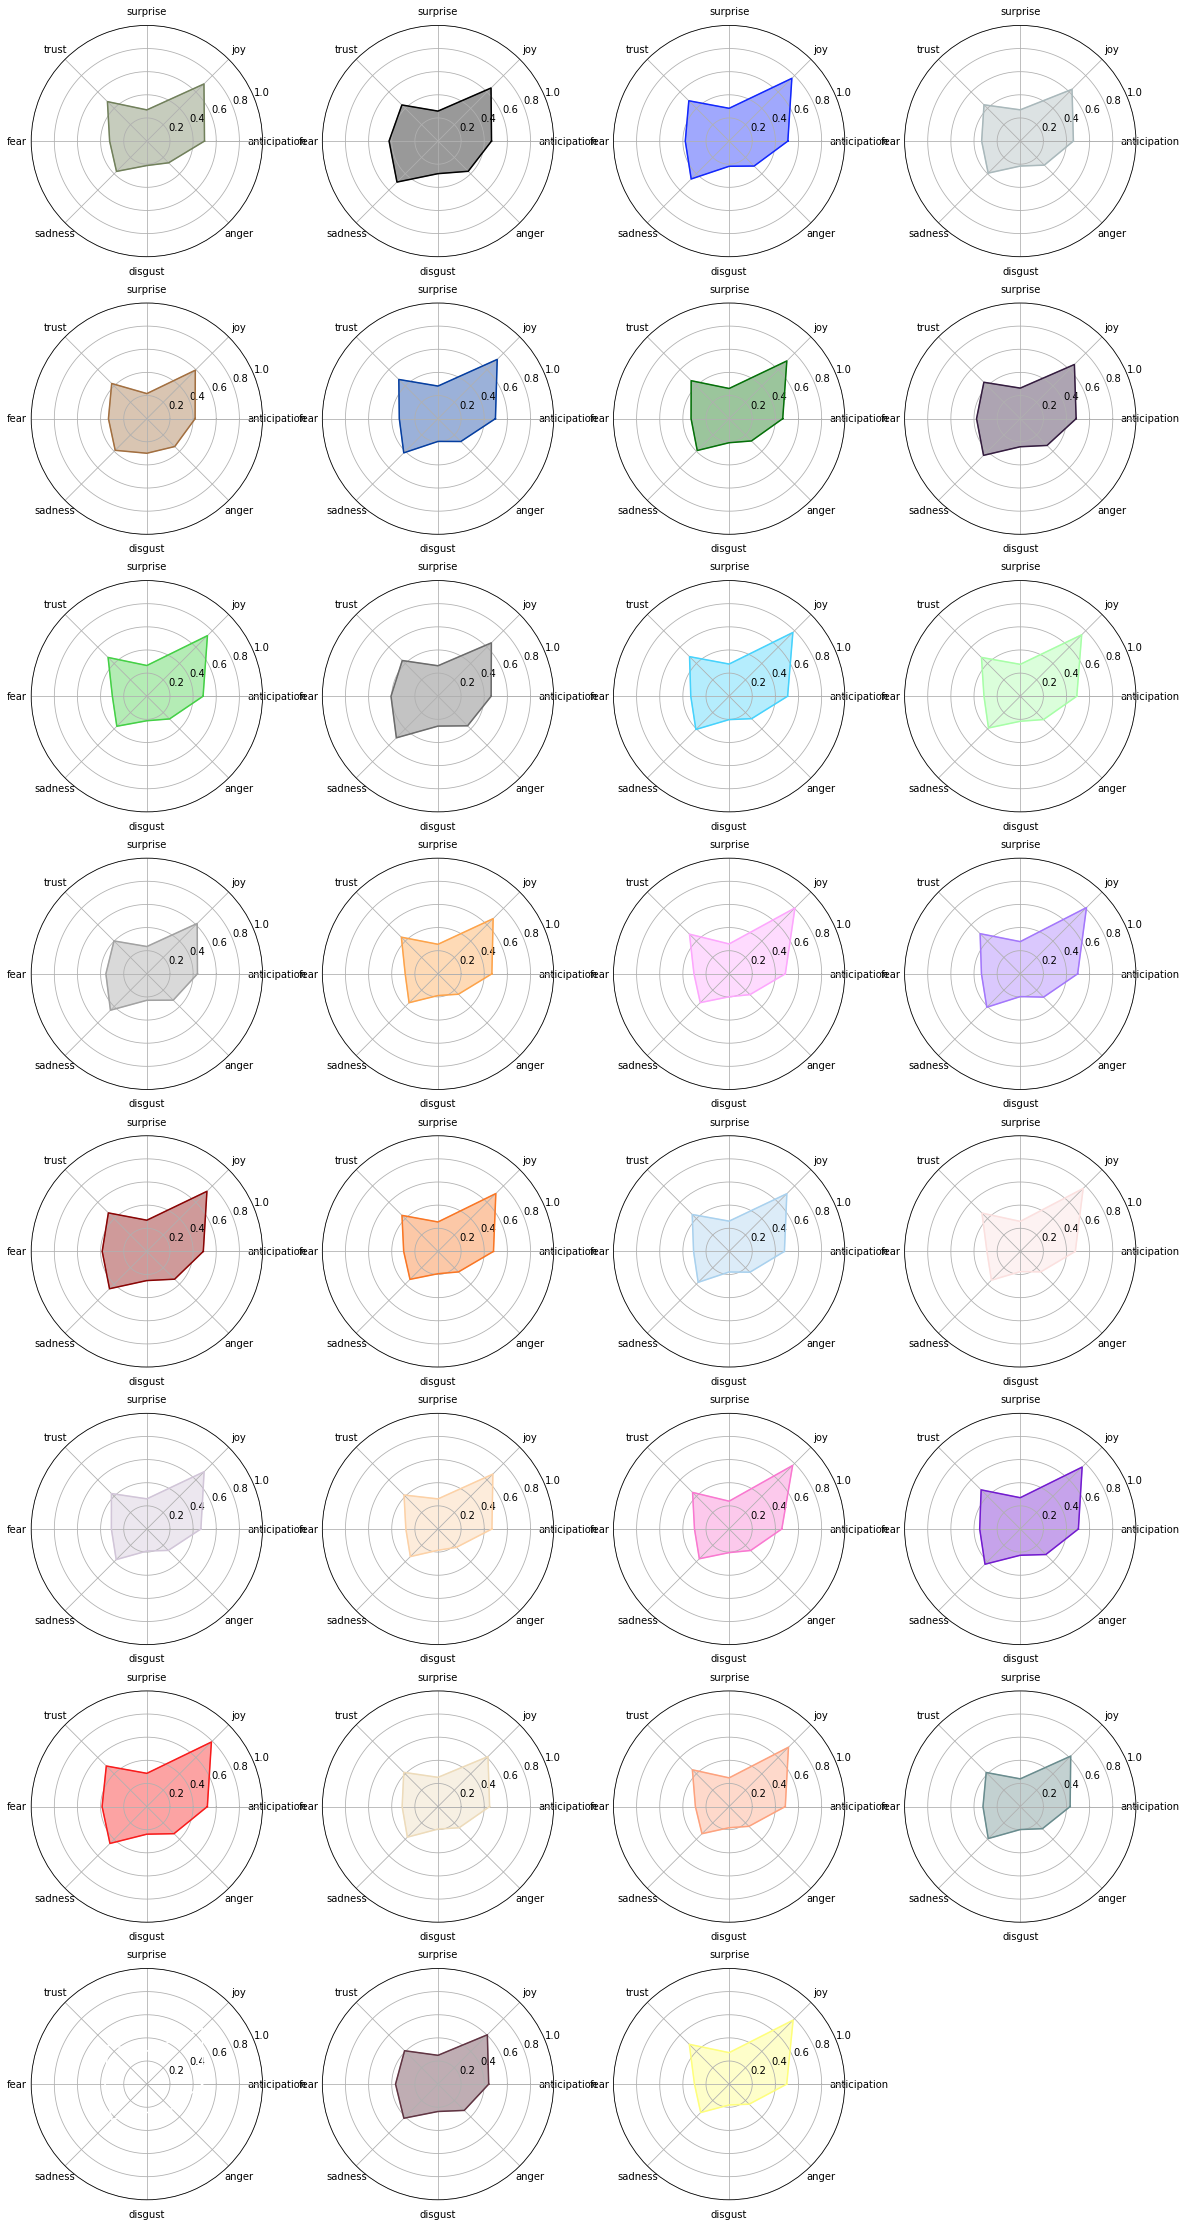

In [195]:
from math import pi
n_emotions = 8
angles = [(i * 2 * pi / n_emotions) % (2 * pi) for i in range(n_emotions)]
angles += [angles[0]]
fig, axs = plt.subplots(8, 4, figsize=(20, 40))
plt.axis('off')

for i in range(len(colors)):
    values = list(colors_emotion.iloc[i, :])
    values += [values[0]]
    ax = plt.subplot(8, 4, i+1, polar=True)
    plt.polar(angles, values, color=colors_colors[colors[i]])
    plt.fill(angles, values, color=colors_colors[colors[i]], alpha=0.4)
    plt.xticks(angles, colors_emotion.columns)
    plt.ylim(0, 1)